In [1]:
# import model_detect_data as model_data
# from model_detect_predict import ModelDetect
# model = ModelDetect()
# check and config model before predict
# model.prepare_for_prediction()
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import detect_text as model_tesseract
import os
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r'Tesseract-OCR/tesseract'

In [3]:
import os
import cv2
import crop_img as crop
import get_detail as get
import matplotlib.pyplot as plt
import numpy as np
#Preprocessing
def Processing(name):
    img=crop.set_image_dpi(name)
    #Read image
    image = cv2.imread(img)
    os.remove(img)
    #resize image for all picture to standard
    re_image=crop.image_resize(image,height=640)
    
    #Cắt khung cmnd từ các filter, sau đó xác định mặt
    info=list(get.split_image(re_image))
    
    if(len(info)>0):
        #IN mặt cmnd đang nhận diện
        plt.figure()
        plt.imshow(info[-2])
        
        #Xác định các mặt cmnd/cc
        typed=info[-1]
        #typed 1: Mặt trước CMND cũ
        #typed 2: Mặt trước căn cước công dân
        #typed 3: Mặt sau chứng minh nhân dân
        #typed 4: Mặt sau căn cước công dân
        
        #chạy model detect vùng text(chưa khả dụng)
#         conn_bbox, text_bbox, conf_bbox,img_draw = model.predict_text(info[-2])
        
        #In thông tin các phần của cmnd
        
#         if typed >=1 and typed <=4:
#             n_img= len(info)-2
#             for i in range(n_img):
#                 plt.figure()
#                 plt.imshow(info[i])
    return typed,info

Mặt trước căn cước công dân
--- 0.29964280128479004 seconds ---


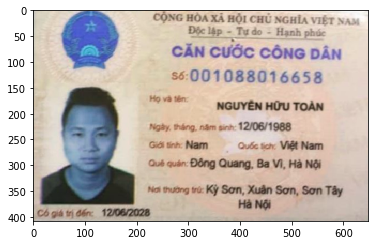

In [4]:
import time
#Đặc biến tạm
typed=0 #Mặc định ko nhận diện được mặt nào
info=[]

start_time = time.time()

#Gọi hàm cắt khung cmnd và trả về info dạng list và typed( loại )
typed,info=Processing("test_image/id6.jpg")

print("--- %s seconds ---" % (time.time() - start_time))


Số Căn cước công dân:  (001088016658
họ và Tên:  NGUYÊN HỮU TOÀN
Ngày, tháng, năm sinh:  12/06/1988
giới tính:  Nam
Quốc tịch:  Việt Nam
Quê quán :  Đông Quang, Ba Vì, Hà Nội 
Nơi thường trú:  : Kỷ Sơn, Xuân Sơn, Sơn Tây 
--- 2.2693986892700195 seconds ---


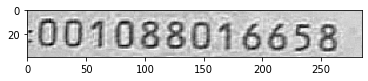

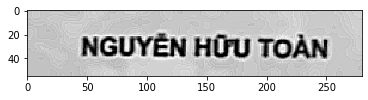

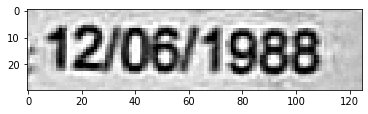

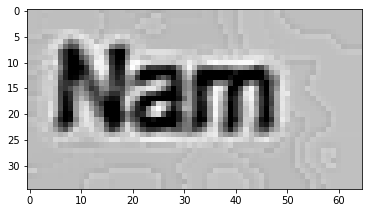

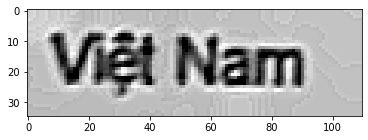

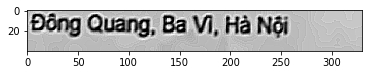

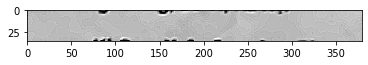

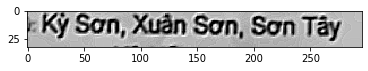

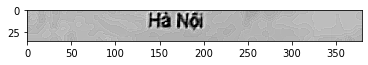

In [5]:
start_time = time.time()
#Gọi hàm xử lý processing(Hàm không trả về output vì đã in kết quả ở hàm)
#Hiện tại hàm chỉ xử dụng cho 2 mặt trước cmnd/ căn cước
if typed>0:
    model_tesseract.Processing(typed,info)
    
print("--- %s seconds ---" % (time.time() - start_time))